In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Regression Analysis: Seasonal Effects with Sklearn Linear Regression
In this notebook, you will build a SKLearn linear regression model to predict Yen futures ("settle") returns with *lagged* CAD/JPY exchange rate returns. 

In [ ]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

In [11]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low,Return,Lagged_Return
Date,,,,,,
1990-01-04,123.46,123.41,123.46,123.41,-1.468476,-0.846720
1990-01-05,124.54,124.48,124.54,124.48,0.874777,-1.468476
1990-01-08,124.27,124.21,124.27,124.21,-0.216798,0.874777
1990-01-09,125.10,125.04,125.10,125.04,0.667901,-0.216798
1990-01-10,125.81,125.75,125.81,125.75,0.567546,0.667901


# Data Preparation

### Returns

In [12]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
# YOUR CODE HERE!

cad_jpy_df["Return"] = (cad_jpy_df["Price"].pct_change() * 100)
cad_jpy_df = cad_jpy_df.replace(-np.inf, np.nan).dropna()
cad_jpy_df.head()

,Price,Open,High,Low,Return,Lagged_Return
Date,,,,,,
1990-01-05,124.54,124.48,124.54,124.48,0.874777,-1.468476
1990-01-08,124.27,124.21,124.27,124.21,-0.216798,0.874777
1990-01-09,125.10,125.04,125.10,125.04,0.667901,-0.216798
1990-01-10,125.81,125.75,125.81,125.75,0.567546,0.667901
1990-01-11,125.85,125.80,125.85,125.80,0.031794,0.567546


### Lagged Returns 

In [13]:
# Create a lagged return using the shift function
# YOUR CODE HERE!

cad_jpy_df['Lagged_Return'] = cad_jpy_df['Return'].shift()
cad_jpy_df.dropna(inplace=True)
cad_jpy_df.head()

,Price,Open,High,Low,Return,Lagged_Return
Date,,,,,,
1990-01-08,124.27,124.21,124.27,124.21,-0.216798,0.874777
1990-01-09,125.10,125.04,125.10,125.04,0.667901,-0.216798
1990-01-10,125.81,125.75,125.81,125.75,0.567546,0.667901
1990-01-11,125.85,125.80,125.85,125.80,0.031794,0.567546
1990-01-12,126.00,125.94,126.00,125.94,0.119190,0.031794


### Train Test Split

In [14]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = cad_jpy_df.loc['2018',:] #2018?
test = cad_jpy_df.loc['2019',:] #2019?

In [15]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
# YOUR CODE HERE!

x_train = train["Lagged_Return"].to_frame()
x_test = test["Lagged_Return"].to_frame()
y_train = train["Return"]
y_test = test["Return"]

In [16]:
# Preview the X_train data
x_train.head()

,Lagged_Return
Date,
2018-01-01,-0.256096
2018-01-02,0.245591
2018-01-03,-0.055679
2018-01-04,0.011142
2018-01-05,0.601604


# Linear Regression Model

In [17]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
l_model = LinearRegression()
l_model
l_model.fit(x_train, y_train)


LinearRegression()

# Make predictions using the Testing Data

**Note:** We want to evaluate the model using data that it has never seen before, in this case: `X_test`.

In [19]:
# Make a prediction of "y" values using just the test dataset
predictions = l_model.predict(x_test)
predictions

array([-0.03880471, -0.04037822, -0.03948592, -0.0391516 , -0.04356503,
       -0.04163879, -0.04054936, -0.04004798, -0.04019815, -0.03989783,
       -0.03909591, -0.04138198, -0.04109902, -0.04004833, -0.04141865,
       -0.03940505, -0.0386323 , -0.04074875, -0.04007315, -0.04199489,
       -0.03908431, -0.04004848, -0.04131667, -0.04027139, -0.04160536,
       -0.04071172, -0.04002522, -0.03875278, -0.03842332, -0.04039629,
       -0.04094168, -0.04135846, -0.04081074, -0.03855646, -0.04086305,
       -0.04046714, -0.04061378, -0.04107769, -0.03897792, -0.04156863,
       -0.03997707, -0.03956307, -0.04105078, -0.04068204, -0.0391293 ,
       -0.03968465, -0.03973252, -0.03843568, -0.0396299 , -0.03992532,
       -0.04054365, -0.0410119 , -0.04049181, -0.040712  , -0.03965814,
       -0.04004948, -0.04024572, -0.03911778, -0.03948242, -0.03745361,
       -0.04059887, -0.04167213, -0.03950311, -0.0398992 , -0.04194077,
       -0.04162861, -0.03963303, -0.04029497, -0.04022121, -0.03

In [56]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
# YOUR CODE HERE!

Outcome = y_test.to_frame()
Outcome["Predicted Return"] = predictions
Outcome.head(20)

,Return,Predicted Return
Date,,
2019-01-01,0.124471,-0.038805
2019-01-02,-0.310791,-0.040378
2019-01-03,-0.473875,-0.039486
2019-01-04,1.678988,-0.039152
2019-01-07,0.739372,-0.043565
2019-01-08,0.207951,-0.041639
2019-01-09,-0.036621,-0.040549
2019-01-10,0.036635,-0.040048
2019-01-11,-0.109863,-0.040198


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

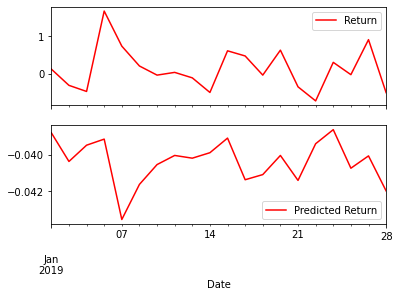

In [57]:
# Plot the first 20 predictions vs the true values
Outcome.head(20)
Outcome[:20].plot(subplots=True
                ,legend=True , color='Red' )

# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (`X_test` and `y_test`)

In [63]:
from sklearn.metrics import mean_squared_error
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe from above)
# YOUR CODE HERE!

mse = mean_squared_error(
    Outcome["Return"],
    Outcome["Predicted Return"])


# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!

rmse = np.sqrt(mse)
print(f"Out of Sample Data: {rmse}")



Mean Squared Error (RMSE): 0.4653441884775524


# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [84]:
# Construct a dataframe using just the "y" training data:
#YOUR CODE HERE!
is_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!

is_results["In sample Predictions"] = l_model.predict(x_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_mse = mean_squared_error(
    is_results["Return"],
    is_results["In sample Predictions"])


# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In Sample Data: {in_sample_rmse}")

In Sample Data: 0.5756978387926047


# Conclusions

**Question:** Does this model perform better or worse on out-of-sample data as compared to in-sample data?

**Answer:** YOUR ANSWER HERE

In [81]:
print(f'Does this model perform better or worse on out-of-sample data as compared to in-sample data?')

print(f'In this model, The out of sample data did better than the in sample data. Out of sample had a root mean squared error of {rmse}, and the in sample data had a root mean squared error of {in_sample_rmse}.')

Does this model perform better or worse on out-of-sample data as compared to in-sample data?
In this model, The out of sample data did better than the in sample data. Out of sample had a root mean squared error of 0.4653441884775524, and the in sample data had a root mean squared error of 0.5756978387926047.
